In [13]:
import fastai
from fastai import *
from fastai.vision import *

In [14]:
print(fastai.__version__)
print("Gpu ",torch.cuda.is_available())

1.0.36.post1
Gpu  True


In [15]:
path = untar_data(URLs.MNIST_SAMPLE)

In [16]:
tfms = get_transforms(do_flip=False)

In [17]:
data = ImageDataBunch.from_folder(path,do_tfms=tfms,size=26,num_workers=0)

In [19]:
learn = create_cnn(data,models.resnet18,metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.206024,0.119957,0.043670
2,0.108266,0.062034,0.021099
3,0.066049,0.056278,0.020118
4,0.056389,0.050232,0.014720


In [20]:
learn.save("mnist-1")

In [21]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.019120,0.004354,0.001963


In [22]:
learn.load("mnist-1")

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (12396 items)
[Category 3, Category 3, Category 3, Category 3, Category 3]...
Path: C:\Users\Administrator\.fastai\data\mnist_sample
x: ImageItemList (12396 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: C:\Users\Administrator\.fastai\data\mnist_sample;

Valid: LabelList
y: CategoryList (2038 items)
[Category 3, Category 3, Category 3, Category 3, Category 3]...
Path: C:\Users\Administrator\.fastai\data\mnist_sample
x: ImageItemList (2038 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: C:\Users\Administrator\.fastai\data\mnist_sample;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


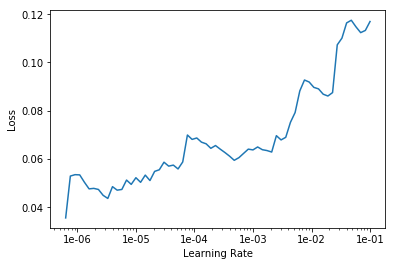

In [24]:
learn.recorder.plot()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.039498,0.040872,0.011776
2,0.025152,0.039302,0.012267
